# Part 3. Scipy

Scipy is a powerful library for scientific and technical computing in Python. It builds on NumPy and provides a wide range of algorithms and functions for optimization, integration, interpolation, eigenvalue problems, algebraic equations, and more.

## 3.1 Scipy for Linear Algebra
Scipy's `linalg` module provides a comprehensive set of functions for performing linear algebra operations. To use its capabilities, we will need to import the module as follows:


In [ ]:
import numpy as np
import numpy.random as rnd

import scipy
import scipy.linalg as linalg # alias for linear algebra functions
from scipy import stats # loading statistical functions

import matplotlib.pyplot as plt

You may be wondering why we are diving into another linear algebra library considering we have already studied `numpy.linalg`. Simply put, `scipy.linalg` contains everything that `numpy.linalg` does but offers additional functionality. It is used in conjuction with numpy ndarrays. 

### 3.1.1 Linear Systems

We can use `scipy.linalg.solve()` to solve, for $\bf{x}$, linear systems of the form

$$ A x = b $$

where $A$ is a matrix, $x$ and $b$ are vectors.

In [7]:
A = np.array([[1,0,2],[0,1,2],[2,1,0]])
b = np.array([[6],[12],[18]])

x = linalg.solve(A, b)


print('A = ',A,'\n')
print('b = ',b,'\n')
print('x = ', x)

A =  [[1 0 2]
 [0 1 2]
 [2 1 0]] 

b =  [[ 6]
 [12]
 [18]] 

x =  [[ 4.]
 [10.]
 [ 1.]]


We can can also solve systems of the form 

$$ A X = B $$

where $A$, $X$, and $B$ are all matrices.

A =  [[1 0 2]
 [0 1 2]
 [2 1 0]] 

b =  [[6, 3, -6], [12, 6, -12], [18, 36, -18]] 

x =  [[  4.  11.  -4.]
 [ 10.  14. -10.]
 [  1.  -4.  -1.]]


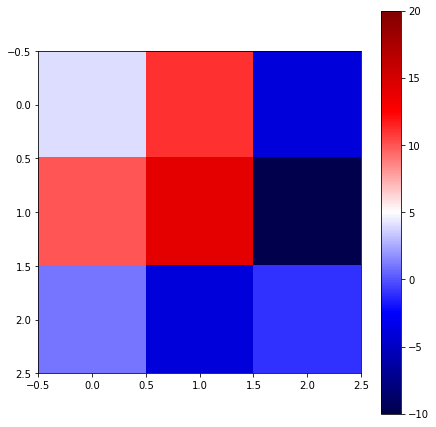

In [8]:
A = np.array([[1,0,2],[0,1,2],[2,1,0]])
B = [[6,3,-6],[12,6,-12],[18,36,-18]]

X = linalg.solve(A, B)

print('A = ',A,'\n')
print('b = ',B,'\n')
print('x = ', X)

fig = plt.figure(figsize = (7,7))
ax = fig.add_axes([.1,.1,.8,.8])

im = ax.imshow(X, cmap='seismic')
fig.colorbar(im, ax=ax)
im.set_clim(vmin=-10, vmax=20)

plt.show()

### 3.1.2 Matrix Functions

The function `scipy.linalg.inv(A)` computes the inverse of a matrix `A`.

In [9]:
A = rnd.random((3,3))
print('A = ', A,'\n')

print('A^-1 = ',linalg.inv(A))

A =  [[0.90793703 0.02559281 0.5592616 ]
 [0.87148729 0.78115408 0.52119322]
 [0.96424101 0.62373748 0.30683951]] 

A^-1 =  [[ 0.45241273 -1.80638908  2.24371588]
 [-1.24573705  1.38094825 -0.07511405]
 [ 1.11060663  2.8693999  -3.63913836]]


The function `scipy.linalg.det(A)` computes the determinant of a matrix `A`.

In [10]:
print('det(A) = ',linalg.det(A))

det(A) =  -0.18876306479783114


Another function, `scipy.linalg.norm(A, ord=2)` computes the modulus of order `ord`. If `ord` $=$ `np.inf`, then the maximum value in $A$ is given. If `ord` $=$ `-np.inf`, then the minimum value in `A` is given.

In [11]:
A = np.array([4,3,1,2,2,1,1])

print('norm(A,ord=1) = 4 + 3 + 1 + 2 + 2 + 1 + 1 = ',linalg.norm(A, ord=1))
print('norm(A,ord=2) = (4**2 + 3**2 + 1**2 + 2**2 + 2**2 + 1**2 + 1**2)**(1/2) = ',linalg.norm(A))
print('norm(A,ord=3) = (4**3 + 3**3 + 1**3 + 2**3 + 2**3 + 1**3 + 1**3)**(1/3) = ',linalg.norm(A, ord=3))
print('norm(A,ord=-np.inf) = ',linalg.norm(A, ord=-np.inf))
print('norm(A,ord=np.inf) = ',linalg.norm(A, ord=np.inf))

norm(A,ord=1) = 4 + 3 + 1 + 2 + 2 + 1 + 1 =  14.0
norm(A,ord=2) = (4**2 + 3**2 + 1**2 + 2**2 + 2**2 + 1**2 + 1**2)**(1/2) =  6.0
norm(A,ord=3) = (4**3 + 3**3 + 1**3 + 2**3 + 2**3 + 1**3 + 1**3)**(1/3) =  4.791419857062784
norm(A,ord=-np.inf) =  1.0
norm(A,ord=np.inf) =  4.0


### 3.1.3 Spectral Decomposition

We can represent a matrix in terms of it's eigenvectors and eigenvalues, or in other words, perform a spectral decomposition; `scipy.linalg.eig(A)` can be used to achive this by computing the eigenvalues and eigenvectors of `A`, giving a tuple.

In [22]:
A = rnd.random((3,3))

eigval, eigvec = linalg.eig(A)

print('Eigenvalues = ',eigval, '\n')
print('Eigenvector Matrix = ',eigvec, '\n')

print('First Eigenvector = ',eigvec[:,0], '\n')

Eigenvalues =  [ 1.35389788+0.j        -0.04622396+0.2803132j -0.04622396-0.2803132j] 

Eigenvector Matrix =  [[ 0.68257443+0.j          0.75080429+0.j          0.75080429-0.j        ]
 [ 0.71906777+0.j         -0.48821975-0.19373787j -0.48821975+0.19373787j]
 [ 0.13051318+0.j         -0.0674027 +0.39478716j -0.0674027 -0.39478716j]] 

First Eigenvector =  [0.68257443+0.j 0.71906777+0.j 0.13051318+0.j] 



### 3.1.4 Special Matrices

Scipy supports the creation of special matrices that are commonly used. A full list can be found at https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html. 

For example, we can create a Hadamard matrix (which is a square matrix whose entries are either +1 or -1) of order `n` using `scipy.linalg.hadamard(n)`. The integer `n` must be a power of $2$.

In [25]:
H = linalg.hadamard(n=2)

print(H)

[[ 1  1]
 [ 1 -1]]


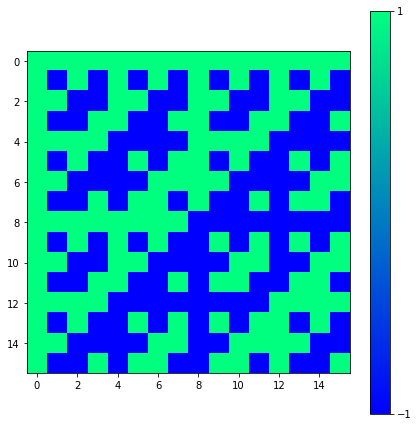

In [34]:
H = linalg.hadamard(n=2**4)

fig = plt.figure(figsize = (7,7))
ax = fig.add_axes([.1,.1,.8,.8])

im = ax.imshow(H, cmap='winter')
fig.colorbar(im, ticks=[-1,1])

plt.show()

### 3.1.5 Sparse Matrix

A sparse matrix (loosely defined) is a matrix with a many zero elements. When dealing with large sparse matrices it is extrememly useful to take advantage of their sparseness and the memory requirements, speeding-up our code. To convert from a memory dense matrix to a memory sparse matrix we use `scipy.sparse.csr_matrix(A)`.

In [35]:
A = np.array([[0,0,1],[2,0,0],[0,3,0]])
print(A,'\n')

A = scipy.sparse.csr_matrix(A)
print(type(A),'\n')
print(A)

[[0 0 1]
 [2 0 0]
 [0 3 0]] 

<class 'scipy.sparse.csr.csr_matrix'> 

  (0, 2)	1
  (1, 0)	2
  (2, 1)	3


Notice that each tuple corrseonds to the element location. We can conceivably represent any matrix in this form, but clearly this would be less efficient for non-sparse matrices. We can perform the standard matrix operations with sparse matrices as shown below. To convert back to a dense matrix, we use the `A.todense()`.

In [39]:
print(A.todense(),'\n')

print((A+A).todense(),'\n')

print((A*A).todense(),'\n')

print((A.dot(A)).todense(),'\n')

print(A, '\n')

vec = np.array([[1],[2],[3]])

print((A*vec))

[[0 0 1]
 [2 0 0]
 [0 3 0]] 

[[0 0 2]
 [4 0 0]
 [0 6 0]] 

[[0 3 0]
 [0 0 2]
 [6 0 0]] 

[[0 3 0]
 [0 0 2]
 [6 0 0]] 

  (0, 2)	1
  (1, 0)	2
  (2, 1)	3 

[[3]
 [2]
 [6]]


It is also useful to initialise an empty sparse matrix and then populate it with non-zero elements with `scipy.sparse.lil_matrix((n,m))`. This saves us from creating a very large matrix with many zeros in the first place.

In [43]:
A = scipy.sparse.lil_matrix((3,3)) #Empty 3x3 sparse matrix

A[0,0] = 1
A[0,1] = 2
A[2,0] = 7
A[2,2] = 1


print(A,'\n')
print(A.todense())

  (0, 0)	1.0
  (0, 1)	2.0
  (2, 0)	7.0
  (2, 2)	1.0 

[[1. 2. 0.]
 [0. 0. 0.]
 [7. 0. 1.]]


### 3.1.6 Matrix Exponential

The matrix exponential of a matrix $A$ is written as

$$ \exp (A) = e^{A} = \sum_{k=0}^{\infty} \frac{1}{k!}A^k . $$

This seems like a monumental task but it can easily be achieved with `scipy.linalg.expm(A)`.

In [3]:
n=4
A = (1/np.sqrt(n))*linalg.hadamard(n)
print(A,'\n')

expA = linalg.expm(A)

print(expA,'\n')

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]] 

[[ 2.13068123  0.5876006   0.5876006   0.5876006 ]
 [ 0.5876006   0.95548004  0.5876006  -0.5876006 ]
 [ 0.5876006   0.5876006   0.95548004 -0.5876006 ]
 [ 0.5876006  -0.5876006  -0.5876006   2.13068123]] 



Also we can verify that 
$$ \exp \left(A^T\right) = \exp \left(A\right)^T $$
and
$$ \exp \left(A^\dagger \right) = \exp \left(A \right)^\dagger $$
up to a computational error.

In [5]:
A = rnd.random((n,n)) + 1j*rnd.random((n,n))

Q = np.round(linalg.expm(A).T,3) == np.round(linalg.expm(A.T),3)
print(Q,'\n')

Q = np.round((np.matrix(linalg.expm(A))).H,3) == np.round(linalg.expm(np.matrix(A).H),3)
print(Q,'\n')

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 



One key point with matrices is that if $A$ and $B$ do not commute,

$$AB \neq BA \iff [A,B]= AB -BA \neq0.$$
then

$$ e^A e^B \neq e^{A+B}.$$

But if 

$$[A,B]= AB -BA =0$$

then

$$e^Ae^B = e^{A+B}. $$

In [62]:
A = np.array([[0,1],[0,0]])
B = np.eye(2)
# These matrices commute

EA = linalg.expm(A)@linalg.expm(B) == linalg.expm(A+B)
print(EA,'\n')

A = np.array([[0,1],[0,0]])
B = np.array([[0,1],[1,0]])
# These matrices do not commute

EA = linalg.expm(A)@linalg.expm(B) == linalg.expm(A+B)
print(EA,'\n')

[[ True  True]
 [ True  True]] 

[[False False]
 [False False]] 



### 3.1.7 Unitary Matrix

A Unitary Matrix is defined as a matrix that satisfies the following equation,

$$AA^{\dagger} =  A^{\dagger}A = \mathbb{1}$$

where $\mathbb{1}$ is the identity matrix. In other words the Hermitian conjugate of the matrix is it's multiplicative inverse,

$$A^{-1} = A^\dagger$$

The Hadamard gate is unitary as we see below.

In [63]:
n=4
A = (1/np.sqrt(n))*linalg.hadamard(n)
print(A,'\n')
A = np.matrix(A)

print(A*A.H==A.H*A,'\n')

print(A*A.H,'\n')

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]] 

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 



We can also generate a random unitary matrix, of dimension `n`, using `scipy.stats.unitary_group.rvs(n)`.

In [64]:
U = stats.unitary_group.rvs(n)

print(np.round(np.dot(U,U.conj().T)),'\n')

U = np.matrix(U)

print(np.round(U,3),'\n')

print(np.round(U.H*U))

[[ 1.+0.j  0.-0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j -0.+0.j  0.-0.j]
 [ 0.-0.j -0.-0.j  1.+0.j  0.+0.j]
 [ 0.-0.j  0.+0.j  0.-0.j  1.+0.j]] 

[[ 0.038+0.194j  0.672+0.188j -0.314+0.106j -0.338+0.501j]
 [-0.653-0.313j  0.144+0.286j  0.472+0.305j  0.137+0.194j]
 [ 0.154-0.329j -0.142+0.047j  0.207-0.683j  0.024+0.58j ]
 [ 0.439-0.334j  0.564+0.265j  0.227-0.118j  0.257-0.42j ]] 

[[ 1.+0.j  0.+0.j -0.+0.j -0.+0.j]
 [ 0.-0.j  1.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  0.-0.j  1.+0.j -0.+0.j]
 [-0.-0.j  0.-0.j -0.-0.j  1.+0.j]]


### 3.1.8 Tensor Product

In the function `scipy.sparse.kron(A,B)` the matrices/vectors `A` and `B` can be sparse or dense. The tensor product is computed as a sparse matrix. The tensor product of two $2\times2$ matrices $A$ and $B$ is as follows

$$ A = 
\begin{pmatrix}
a_{11} & a_{12} \\ 
a_{21} & a_{22}
\end{pmatrix}, 
\ \ \ \ 
B = 
\begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix},$$

$$ A \otimes B = 
\begin{pmatrix}
a_{11} B & a_{12} B \\ 
a_{21} B & a_{22} B
\end{pmatrix} = 
\begin{pmatrix}
a_{11} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} & a_{12} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} \\ 
a_{21} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} & a_{22} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
a_{11} b_{11} & a_{11} b_{12} & a_{12} b_{11} & a_{12} b_{12} \\ 
a_{11} b_{21} & a_{11} b_{22} & a_{12} b_{21} & a_{12} b_{22} \\ 
a_{21} b_{11} & a_{21} b_{12} & a_{22} b_{11} & a_{22} b_{12} \\ 
a_{21} b_{21} & a_{21} b_{22} & a_{22} b_{21} & a_{22} b_{22}
\end{pmatrix}.$$
The sucture is similar for differently shaped matrices and vectors.

In [69]:
A = np.array([[1, -2], [-1, 2]])
B = np.array([[1, 2], [3, 4]])

result_dense = scipy.sparse.kron(A,B)

print('Result dense = \n',result_dense.todense(),'\n')

A = scipy.sparse.csr_matrix(A)
B = scipy.sparse.csr_matrix(B)

result_sparse = scipy.sparse.kron(A,B)

print('Result sparse = \n',result_sparse.todense())

Result dense = 
 [[ 1  2 -2 -4]
 [ 3  4 -6 -8]
 [-1 -2  2  4]
 [-3 -4  6  8]] 

Result sparse = 
 [[ 1  2 -2 -4]
 [ 3  4 -6 -8]
 [-1 -2  2  4]
 [-3 -4  6  8]]


### 3.1.9 Least Square Fit

The package `scipy.linalg` also supports least-square fitting, a method that fits data points to a curve. The relavent function is `scipy.linalg.lstsq(A, c)`. To demonstrate how this works, we are going to use this function to approximate the values of $c_1$ and $c_2$ in the following function
$$ y = c_1 x^2 + c_2 x.$$
We will generate data points by adding noise to this function for certain values of $c_1$ and $c_2$. We will then then try to fit the noisy data with `scipy.linalg.lstsq(A, c)`, comparing our approximate values of $c_i$ to the actual values.

Lets set 
$$ c_1 = 0.5$$ and $$ c_2 = 2.0$$
$A$ is a matrix of the set of functions, of $x$, describing $y$. So in this case
$$ A = [x^2,x]$$

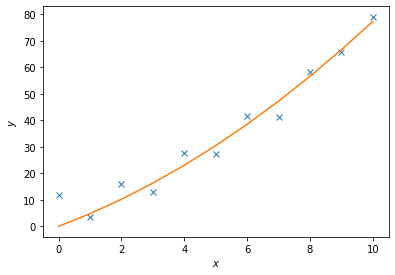

In [70]:
c1, c2 = 0.5, 2.0

x = np.arange(11)

y = c1*x**2 + c2*x

noise = y + 0.2 * np.max(y) * rnd.random(len(y))

A = np.c_[x**2,x]

c, resid, rank, sigma = linalg.lstsq(A, noise)

y2 = c[0]*x**2 + c[1]*x

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,noise,'x',x,y2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

### 3.1.10 Singular Value Decomposition

Singular value decomposition is an extension of the eigenvalue, eigenvector problem to non-square matrices. The following matrices, and vector, are generated using `scipy.linalg.svd()`
$$ A = USv, $$
where $A$ is a non-square matrix, $U$ is a square matrix, $S$ is a diagonal matrix, and $v$ is a vector.

In [71]:
A = rnd.random((3,2))
print('A = ',A,'\n')

U, D, v = linalg.svd(A)

print('U = ',U,'\n')
print('Diagonal Elements = ',D,'\n')
print('v = ',v,'\n')

S = scipy.sparse.lil_matrix((3,2))
S[0,0] = D[0]
S[1,1] = D[1]

S = S.todense()
print('S = ', S, '\n')

print('A = ',U*S*v)

A =  [[0.27802483 0.07730829]
 [0.40778902 0.28641229]
 [0.37630991 0.45691064]] 

U =  [[-0.32224029  0.7448934   0.5842046 ]
 [-0.61281111  0.30623129 -0.72848125]
 [-0.72154261 -0.59275308  0.35779889]] 

Diagonal Elements =  [0.80891983 0.16620306] 

v =  [[-0.75534318 -0.65532944]
 [ 0.65532944 -0.75534318]] 

S =  [[0.80891983 0.        ]
 [0.         0.16620306]
 [0.         0.        ]] 

A =  [[0.27802483 0.07730829]
 [0.40778902 0.28641229]
 [0.37630991 0.45691064]]


### 3.1.11 Schur Decomposition

The Schur Decomposition of $n\times n$ matrices gives said matices in the form
$$A = Z T Z^\dagger $$

Where $Z$ is a unitary matrix, and $T$ is an upper-triangular(or quasi-upper) matrix. We can request these matrices in a real or complex form using `scipy.linalg.schur(A)` and `scipy.linalg.schur(A,'complex')` or by using `scipy.linalg.rsf2csf(A)` for the complex form.

In [72]:
A = rnd.random((3,3))
print('A = ', A, '\n')

T, Z = linalg.schur(A)
Tc, Zc = linalg.schur(A, 'complex')

T, Z, Tc, Zc = map(np.matrix,(T,Z, Tc, Zc))

print('A = ',Z*T*Z.H, '\n')

print('A = ',Zc*Tc*Zc.H)

A =  [[0.55969869 0.98122334 0.22619461]
 [0.24530843 0.08993176 0.0456872 ]
 [0.56829763 0.60138912 0.74087103]] 

A =  [[0.55969869 0.98122334 0.22619461]
 [0.24530843 0.08993176 0.0456872 ]
 [0.56829763 0.60138912 0.74087103]] 

A =  [[0.55969869+0.j 0.98122334+0.j 0.22619461+0.j]
 [0.24530843+0.j 0.08993176+0.j 0.0456872 +0.j]
 [0.56829763+0.j 0.60138912+0.j 0.74087103+0.j]]


In [73]:
print('T = ',T)

T =  [[ 1.20294251  0.52355708 -0.74209033]
 [ 0.          0.40923817 -0.37762384]
 [ 0.          0.         -0.2216792 ]]


In [74]:
print('Z = ',Z)

Z =  [[ 0.52346561  0.78998514  0.31922913]
 [ 0.1498025   0.28349598 -0.94720074]
 [ 0.83877468 -0.54364834 -0.03005865]]


## 3.2 Scipy Optimization
Scipy's `optimize` module provides a variety of optimization algorithms for finding the minimum or maximum of functions, solving equations, and performing curve fitting.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy
from scipy import optimize

### 3.2.1 Function Minimum
We can use `scipy.optimize.minimize()` to find the minimum of a scalar function of one or more variables. The function takes as input the function to be minimized, an initial guess for the variables, and optional arguments such as method and bounds. 

First we define a function to be minimized:

In [ ]:
def f(b):
    return -(.6*np.log(1+b[0]-b[1]-b[2])+.3*np.log(1-b[0]+2*b[1]-b[2])+.1*np.log(1-b[0]-b[1]+4*b[2]))

Then, we can use `minimize` to find the minimum of this function starting from an initial guess. The result object contains information about the optimization process, including the optimal values of the variables and the function value at the minimum.

In [ ]:
from scipy.optimize import Bounds
bounds = Bounds([0.0, 1.0], [0.0, 1.0],[0.0, 1.0])

initial_guess = np.array([0.0,0.0,0.0])
result = optimize.minimize(f, initial_guess, bounds=bounds)
print(result)

IndexError: index 2 is out of bounds for axis 0 with size 2

Given some function we are able to find a local minimum using `scipy.optimize.fmin(f,x0)`, where `f` is the function in question, `x0` is an initial guess.

In [50]:
def f(x):
    return x**4 + x**3 + x**2 - 7*x + 10

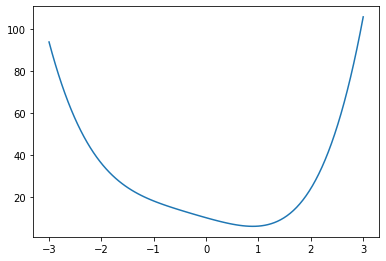

In [51]:
x = np.linspace(-3,3,100)

y = f(x)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,y)

plt.show()

In [52]:
x_min = optimize.fmin(f, 0)
print(x_min)

Optimization terminated successfully.
         Current function value: 5.894475
         Iterations: 24
         Function evaluations: 48
[0.8914375]


However if the function has multiple local minima the initial guess will determine which is found.

In [66]:
def g(x):
    return x**4 - x**3 - 5* x**2 + x + 0

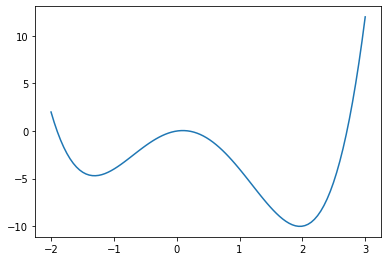

In [57]:
x = np.linspace(-2,3,100)

y = g(x)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,y)

plt.show()

In [81]:
x_min1 = optimize.fmin(g, -1)
print('x_min1 =',x_min1,'\n')

x_min2 = optimize.fmin(g, 1)
print('x_min2 =',x_min2)

Optimization terminated successfully.
         Current function value: -4.697455
         Iterations: 14
         Function evaluations: 28
x_min1 = [-1.3078125] 

Optimization terminated successfully.
         Current function value: -10.019646
         Iterations: 16
         Function evaluations: 32
x_min2 = [1.96025391]


### 3.2.2 Global Optimization

We can find the global minimum of a function, within given bounds, using `scipy.optimize.differential_evolution(func,bounds)`. `bounds` will be a list of lists containing the max and min of the input parameters of `func`. It should be noted that this works best when `func` takes in one argument which is a list of the input parameters. Running this function returns the information about the optomisation process with the min value found stored as `x`.

In [79]:
result = scipy.optimize.differential_evolution(g,[[-2,3]])

print(result)

     fun: array([-10.01964635])
     jac: array([-1.42108548e-06])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 3
 success: True
       x: array([1.96027333])


A similar process can be achieved with multivariable functions too.

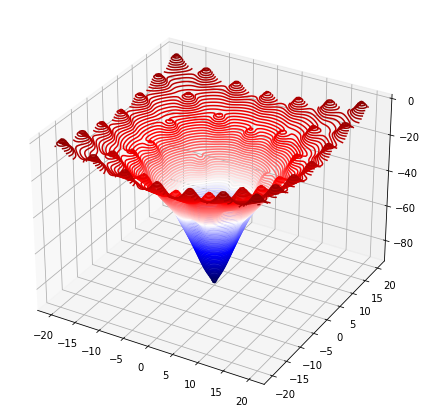

In [85]:
def f(params):
    return -100. * np.exp(-0.1*np.sqrt(params[0]**2 + params[1]**2)) + np.exp(np.cos(params[0]) + np.cos(params[1]))
    
x_bound = [-20,20]
y_bound = [-20,20]
    
xs = np.linspace(x_bound[0], x_bound[1], 100)
ys = np.linspace(y_bound[0], y_bound[1], 100)

Xmesh,Ymesh = np.meshgrid(xs, ys)
Zmesh = f([Xmesh,Ymesh])

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,.8,.8],projection='3d')

ax.contour3D(Xmesh,Ymesh,Zmesh,90,cmap='seismic')

plt.show()

In [86]:
bounds = [x_bound,y_bound]
result = scipy.optimize.differential_evolution(f,bounds)

print(np.round(result.x,2))

[-0. -0.]


### 3.2.3 Function Roots
We can use `scipy.optimize.root()` to find the roots of a function (i.e., the points where the function evaluates to zero). This function takes as input the function whose roots we want to find, an initial guess for the variables, and optional arguments such as method and bounds.

First we define a function whose roots we want to find, then, we can use `root` to find the roots of this function starting from an initial guess. The result object contains information about the root-finding process, including the estimated roots and a success flag indicating whether the algorithm converged.

Example:

The function `scipy.optimize.fsolve(f,x0)` finds the roots of a function `f`, given an initial guess array `x0`.

In [140]:
randy = rnd.random(3)

def f(x):
    return 0.25*randy[0]*x**2 - randy[1]*2*x - randy[2]

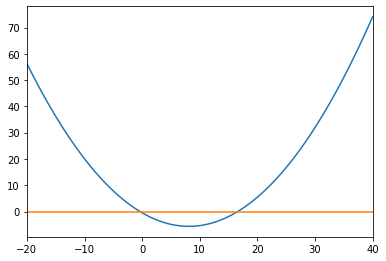

In [141]:
x = np.linspace(-20,40,100)

y = f(x)

y2 = np.zeros(len(x))

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])
ax.set_xlim(x[0],x[-1])

ax.plot(x,y,x,y2)

plt.show()

In [142]:
roots = optimize.fsolve(f,[x[0],x[-1]])

print(roots)

print(np.round(f(roots),2))

[-0.37906637 16.59148356]
[-0.  0.]


### 3.2.4 Optimize Least Square Fit
We can use `scipy.optimize.curve_fit()` to perform a least-squares fit of a function to data. This function takes as input the function to be fitted, the independent variable data, the dependent variable data, and optional arguments such as initial parameter guesses and bounds.

Lets try and fit a curve to the following noisy data.

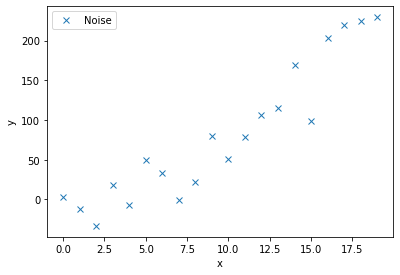

In [148]:
c1, c2 = 0.5, 2.0

x = np.arange(20)

y = c1*x**2 + c2*x

noise = y + 0.2 * np.max(y) * rnd.random(len(y))*((-1)**(2-(np.round(rnd.random(len(y)),0))))

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,noise,'x',label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

We will now define a function to model this curve, as well as a function that calculates the residuals. The residuals are the differrence between each noisy data point and the model being fitted. This `scipy.optimize.leastsq(residuals,c_guess, args=(noise,x))` function gives back the coefficient `c` that minimises the residuals. We must input the noisy data, `noise`, and their corresponding `x` co-ordinates, as well as an intial guess for the coefficients `c_guess`.

[ 0.7283107  -0.65686655]


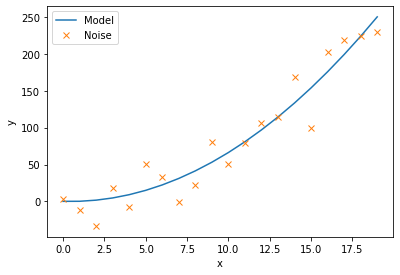

In [149]:
def model(x, c):
    return c[0]*x**2 + c[1]*x

def residuals(c,y,x):
    return y - model(x,c)

c_guess = np.array([0.0,2.1])

c_result, flag = scipy.optimize.leastsq(residuals,c_guess, args=(noise,x))

print(c_result)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x, model(x,c_result), label='Model')
ax.plot(x, noise, 'x', label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

### 3.2.5 Curve Fit

The `scipy.optimize.curve_fit(model,xdata,ydata,p0)` function allows us to directly input the `model` function aswell the noisy data, (`xdata`,`ydata`), along with an initial guess for the model coefficients `p0`. We must define our model function with indiviual coefficeients rather than an array of cefficients.

[ 0.72831071 -0.65686659]


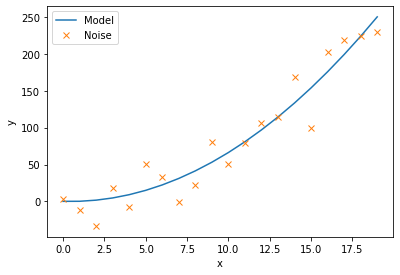

In [150]:
def model(x, c1, c2):
    return c1*x**2 + c2*x

c_result, flag = scipy.optimize.curve_fit(model,x,noise,p0=(0.5,2.0))

print(c_result)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,model(x,c_result[0],c_result[1]),label='Model')
ax.plot(x,noise,'x',label='Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

## 3.3 Scipy Fourier Transform
Scipy's `fftpack` module provides functions for performing Fast Fourier Transforms (FFT) and related operations. FFT is an efficient algorithm for computing the Discrete Fourier Transform (DFT) and its inverse, which are widely used in signal processing, image analysis, and many others.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import scipy
import scipy.linalg as linalg
from scipy.fft import fft, fftfreq, fftshift # here we import the fft functions

### 3.3.1 The Fourier Transform

The Fourier transform changes a singnal into the frequencies of the waves that it make up. To transform a signal $f(t)$, we use the formula

$$ \hat{f}(\omega) = \int_{-\infty}^{+\infty}f(t)e^{-2\pi i \omega t}dt.$$

Scipy makes use of the discretised Fourier Transform:

$$\hat{f}_\omega = \sum_{n=0}^{N-1}f_n e^{-2\pi i \omega \frac{n}{N} }$$

where $f_n$ is the n-th element of an array of size $N$, and $\hat{f}_\omega$ is a new resulting array, of the same size, with each element dependent on the value of $\omega$.

For example:

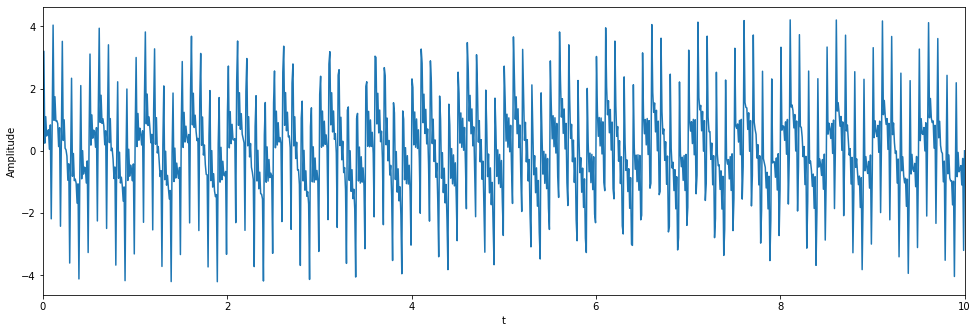

In [44]:
steps = 1000
t = np.linspace(0,10,steps)
w = [1.0,5.0,10.0,15.0,20.0]

signal = 0
for wi in w:
    signal += np.sin(wi*t*2*np.pi)

fig = plt.figure(figsize=(16,5))
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(t,noise)
ax.set_xlabel('t')
ax.set_ylabel('Amplitude')
ax.set_xlim(t[0],t[-1])
plt.show()

The function `fft(signal)` returns the Fourier transform and `fftfreq(n,h)` gives the array of frequencies that correspond to a number of times equal to `n` with gaps of `h` between them.

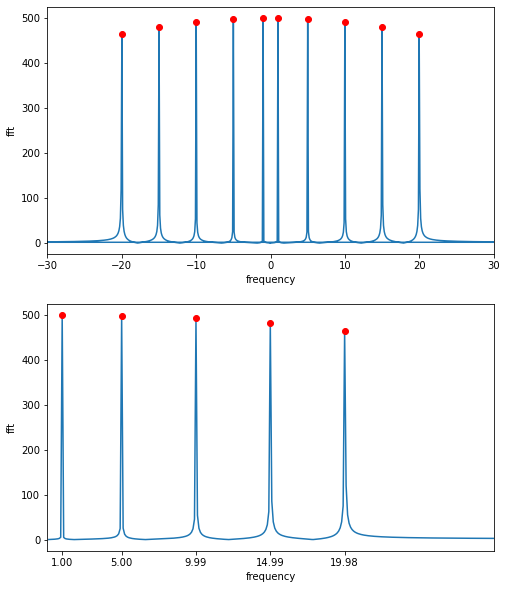

Fourier Transform Peak Frequencies = [ 0.999  4.995  9.99  14.985 19.98 ]


In [46]:
n = len(t)
h = t[1]-t[0]

Fourier = fft(signal)
freq = fftfreq(n, h)

fig, ax = plt.subplots(2,1,figsize=(8,10))

ax[0].plot(freq,abs(Fourier),freq[abs(Fourier) > 300],abs(Fourier)[abs(Fourier) > 300],'ro')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('fft')
ax[0].set_xlim(-30,30)

positive = freq > 0 # select only indices for elements that corresponds to positive frequencies
freq = freq[positive]
Fourier = Fourier[positive]

ax[1].plot(freq,abs(Fourier),freq[abs(Fourier) > 300],abs(Fourier)[abs(Fourier) > 300],'ro')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('fft')
ax[1].set_xlim(0,30)
ax[1].set_xticks(freq[abs(Fourier) > 300])

plt.show()

print('Fourier Transform Peak Frequencies =', freq[abs(Fourier) > 300])

### 3.3.2 Wave Packet

We can create a more confined wave, called a wavepacket with the following function

$$\psi(x) = \frac{1}{(\pi \sigma^2)^{\frac{1}{4}}}e^{-\frac{(x-x_0)^2}{2\sigma^2}}e^{ifx} $$

Where $\sigma$ is the width, $x_0$ is it's position, and $f$ is it's frequency.

Omega = 8.0


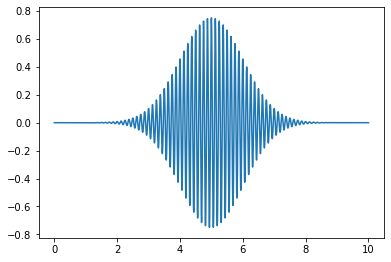

In [36]:
steps = 10000
x = np.linspace(0, 10, steps)
h = x[1]-x[0]
n = len(x)

f = 8*2*np.pi
print('Omega =', f/(2*np.pi))

sigma = 1.0

x0 = 5.0
packet = (1.0/np.sqrt(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,packet.real)

plt.show()

Now lets perform a Fourier transform.

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


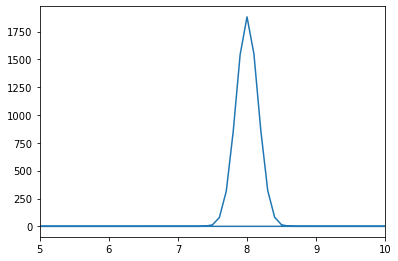

In [5]:
Fourier = fft(packet)
freq = fftfreq(n,h)

print('Omega = ', f/(2*np.pi))
m = abs(Fourier) >= max(abs(Fourier))
print('Fourier Transform Frequency Peak = ',np.round(freq[m],2))

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(freq, abs(Fourier))
ax.set_xlim(5, 10)

plt.show()

Notice that we obtain a normal distribution around the frequency of the wavepacket.

### 3.3.3 The Uncertainty Principle

You may be familiar with the Heisenburg Uncertainty Principle for a quantum objects position and momentum(or time and energy), which states that the more we know about a particles position in space, the less we know about its momentum and vice versa. This is encapsulated in the formula

$$\Delta x \Delta p \geq \frac{\hbar}{2} $$

This is a result of position and momentum, in the quantum sense, being related by a Fourier transform. That is, if we take the Fourier transform of some noise, the more definitive the distribution of that noise, the more broad the distributions of possible frequencies in the Fourier transform. 

Exercise:
Take the above wave packet and change the value of $\sigma$, the width of the wave, and observe the resulting Fourier transform. For low values of $\sigma$, the resulting frequency distribution is broad. For high values of $\sigma$, the resulting frequency distribution sharpens at one frequency. 

In [6]:
def wavepacket(sigma, f):
    steps = 10000
    x = np.linspace(0, 10, steps)
    h = x[1]-x[0]
    n = len(x)

    f = f*2*np.pi
    print('Omega = ', f/(2*np.pi))


    x0 = 5.0
    packet = (1.0/(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

    fig1 = plt.figure()
    ax1 = fig1.add_axes([.1,.1,.8,.8])
    
    ax1.plot(x,packet.real)
    
    plt.show()
    
    Fourier = fft(packet)
    freq = fftfreq(n,h)

    print('Omega = ', f/(2*np.pi))
    m = abs(Fourier) >= max(abs(Fourier))
    print('Fourier Transform Frequency Peak = ',np.round(freq[m],2))

    fig2 = plt.figure()
    ax2 = fig2.add_axes([.1,.1,.8,.8])
    
    ax2.plot(freq, abs(Fourier))
    ax2.set_xlim(0, 20)
    
    plt.show()

Omega =  8.0


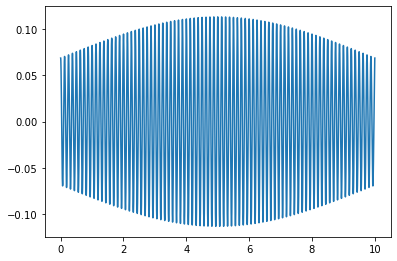

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


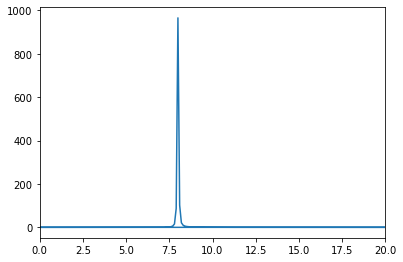

In [7]:
wavepacket(sigma=5.0,f=8)

Omega =  8.0


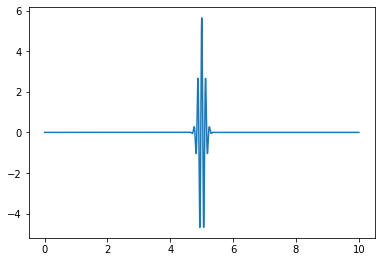

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


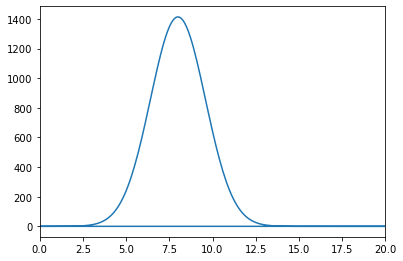

In [8]:
wavepacket(sigma=0.1,f=8)

Omega =  8.0


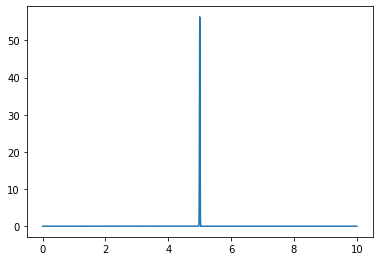

Omega =  8.0
Fourier Transform Frequency Peak =  [8.]


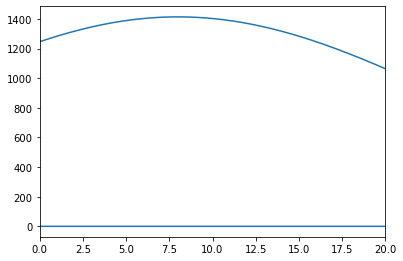

In [9]:
wavepacket(sigma=0.01,f=8)

## 3.4 Quantum Fourier Transform

### 3.4.1 Single Qubit

Recall that a quantum object can be represented by a superposition of basis states, where each basis state has a corresponding amplitude. Squaring the amplitude gives the probability of measuring the quantum object in that state. For a quantum object with $N$ basis states:

$$ |x> = x_0|0> + x_1|1> + x_2|2> + ... + x_{N-1}|N-1>$$

or more compactly

$$ |x> = \sum_{j=0}^{N-1}x_j|j> $$

For example, a single qubit with equal probability of being in basis states $|0>$ or $|1>$ is represented by

$$ |q> = \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>$$

We can therefore fully represent this state in an array with elements $x_j$. We can change to another basis of states using a discrete fourier transform(with normalisation constant $1/\sqrt{N}$), changing the amplitudes $x_j$.

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j e^{-2\pi i k \frac{j}{N} }$$

Giving new amplitudes $y_k$ in a different basis.

$$ |y> = \sum_{k=0}^{N-1}y_k|k> $$

But this is just the same as using the discrete fourier transform in the above sections. 

Lets do an example, applying a quantum fourier transform to the following qubit

$$ |x> = x_0|0> + x_1|1>$$

$$y_0 = \frac{1}{\sqrt{2}}(x_0e^{-2\pi i \frac{0\times 0}{2}} + x_1e^{-2\pi i \frac{0\times 1}{2}}) = \frac{1}{\sqrt{2}}(x_0 + x_1) $$

$$y_1 = \frac{1}{\sqrt{2}}(x_0e^{-2\pi i \frac{1\times 0}{2}} + x_1e^{-2\pi i \frac{1\times 1}{2}}) = \frac{1}{\sqrt{2}}(x_0 - x_1) $$

Lets impliment this in scipy.

In [10]:
n=2
h = 1

x0 = 0
x1 = 1

x = np.array([x0,x1])

y = 1/np.sqrt(n)*fft(x)

print('|x> = ',x)
print('<x|x> = ',abs(x)**2,'\n')

print('|y> = ',y)
print('<y|y> = ',abs(y)**2)

|x> =  [0 1]
<x|x> =  [0 1] 

|y> =  [ 0.70710678+0.j -0.70710678-0.j]
<y|y> =  [0.5 0.5]


Representing $|x>$ as a vector, we can see that $|y>$ results from the multiplication of a Hadamard gate. So, Hadamard gates are closely related to the QFT.

$$ |x> = \begin{bmatrix}x_0 \\ x_1 \end{bmatrix} $$

$$ |y> = \begin{bmatrix}y_0 \\ y_1 \end{bmatrix} $$

$$ \begin{bmatrix}y_0 \\ y_1 \end{bmatrix} =\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix}x_0 \\ x_1 \end{bmatrix} = H\begin{bmatrix}x_0 \\ x_1 \end{bmatrix} $$

$$|y> = H|x> $$

In [ ]:
x0 = 0
x1 = 1

x = np.array([x0,x1])

H = linalg.hadamard(2)

y = 1/np.sqrt(2)*H@x

print('|x> = ',x)
print('|y> = ',y)

|x> =  [0 1]
|y> =  [ 0.70710678 -0.70710678]


### 3.4.2 Multiple Qubits

We can perform a Quantum Fourier Transform on multiple qubits, where each row in the array $x$ and $y$ represents a different qubit. For two qubits:

In [12]:
n=2
h = 1

x = np.array([[0,1],[1/np.sqrt(2),1/np.sqrt(2)]])

y = 1/np.sqrt(n)*fft(x)

print('|x> = ',x,'\n')
print('<x|x> = ',abs(x)**2, '\n')

print('|y> = ',abs(y),'\n')
print('<y|y> = ',abs(y)**2,'\n')

|x> =  [[0.         1.        ]
 [0.70710678 0.70710678]] 

<x|x> =  [[0.  1. ]
 [0.5 0.5]] 

|y> =  [[0.70710678 0.70710678]
 [1.         0.        ]] 

<y|y> =  [[0.5 0.5]
 [1.  0. ]] 



### 3.4.3 The Bloch Sphere

We can represent the above transformations on the bloch sphere, using the parametrisation

$$|\psi> = cos(\frac{\theta}{2})|0> + e^{i\phi}sin(\frac{\theta}{2})|1> $$

So for $\phi=0$ and $\theta = \frac{\pi}{2}$

$$|\psi> = \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1> $$

And for $\phi=0$ and $\theta = \pi$

$$|\psi> = 0|0> + 1|1> $$

In [6]:
 def blochplot(phi,theta):
    #Defining the state
    psi = [np.cos(theta/2.0),np.exp(1j*phi)*np.sin(theta/2.0)]
    
    #printing it's probability amplitudes
    print('psi = {}|0> + {}|1>'.format(np.round(abs(psi[0]),2),np.round(abs(psi[1]),2)))
    print('psi prob = {} , {}'.format(np.round(abs(psi[0])**2,2),np.round(abs(psi[1])**2,2)))

    #Using spherical coordinates
    x=np.cos(phi)*np.sin(theta)
    y=np.sin(phi)*np.sin(theta)
    z=np.cos(theta)

    #Plotting a sphere of radius 1, with a black point at it's centre
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([0,0,1,1],projection='3d')
    ax.grid(False)
    ax.set_axis_off()
    
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
    xsphere = np.cos(u)*np.sin(v)
    ysphere = np.sin(u)*np.sin(v)
    zsphere = np.cos(v)
    
    ax.plot_wireframe(xsphere, ysphere, zsphere, color="b",lw=0.3)
    ax.scatter([0], [0], [0], color="black", s=50)
    
    #Draw a new axis
    ax.plot([-2,2],[0,0],[0,0],color='black',linestyle='--')
    ax.plot([0,0],[-2,2],[0,0],color='black',linestyle='--')
    ax.plot([0,0],[0,0],[-2,2],color='black',linestyle='--')
    
    #Plotting Text Labels
    ax.text(0, -0.0, 1.3, r"$|0\rangle$", color='black',size=15)
    ax.text(0, -0.0, -1.5, r"$|1\rangle$", color='black',size=15)
    
    
    #ax.text(0, -1.5, -0.2, "|+>", color='black',size=15)
    #ax.text(0, 1.4, 0.2, "|->", color='black',size=15)

    #Plotting a vector of the quantum state.
    ax.plot([0,x],[0,y],[0,z], color='r')
    ax.scatter([x], [y], [z], color="red", s=50,marker= 'o')
    
    plt.show()

Suppose we are in the state $|0>$ with absolute certainty, then $\phi=0$ and $\theta=0$


$$|\psi> = 1|0> + 0|1> $$

This is represented on the bloch sphere as

psi = 1.0|0> + 0.0|1>
psi prob = 1.0 , 0.0


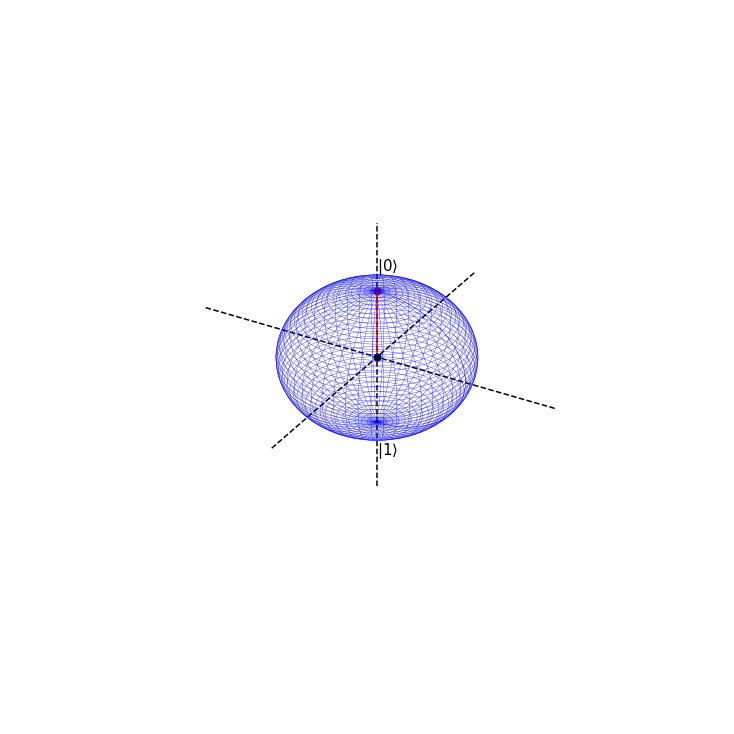

In [7]:
phi=0
theta = 0*np.pi

blochplot(phi,theta)

If we apply a QFT or Hadamard gate on $\psi$, the result will be the following state

$$\psi_H = H\psi = \frac{1}{\sqrt{2}}(x_0 + x_1)|0> + \frac{1}{\sqrt{2}}(x_0 - x_1)|1> = \frac{1}{\sqrt{2}}(|0>+|1>) $$

which has corresponding values $\phi=0$ and $\theta =\frac{\pi}{2} $.

psi = 0.71|0> + 0.71|1>
psi prob = 0.5 , 0.5


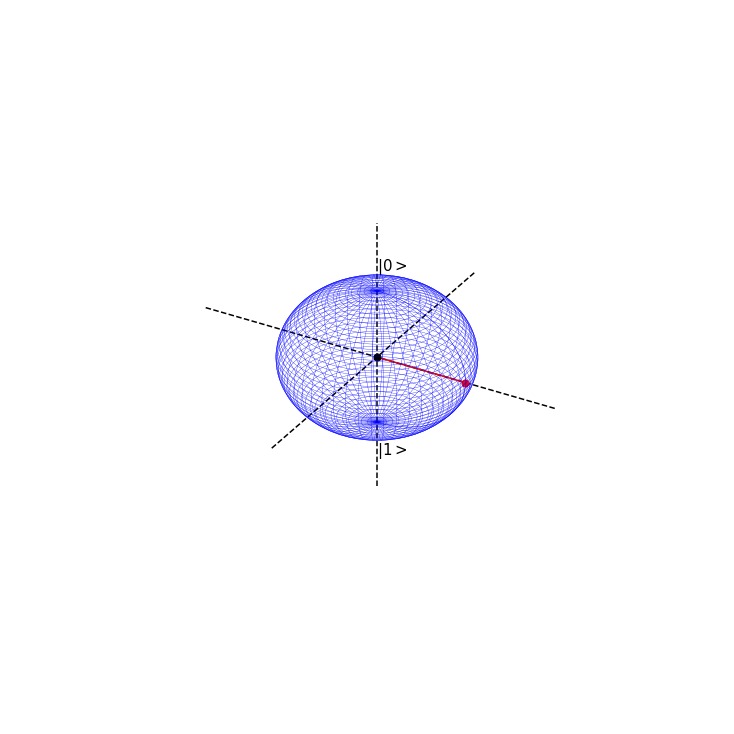

In [15]:
phi=0
theta = np.pi/2.0

blochplot(phi,theta)

This can be seen as an entirely new basis state. We shall label it as

$$|+> =  \frac{1}{\sqrt{2}}(|0>+|1>) $$
$$|-> =  \frac{1}{\sqrt{2}}(|0>-|1>) $$

Notice that when we have maximal certainty about our initial state $|\psi> = 1|0>+0|0>$, we have minimal uncertainty about the state we quantum fourier transform into

$$|+> =  \frac{1}{\sqrt{2}}(|0>+|1>) $$

The prior is definitely in the state $|0>$ but the latter has equal chance of being in state $|0>$ or $|1>$. However, in the latter, we know with absolute certainty that it is in state $|+>$, but

$$|\psi>= |0> =  \frac{1}{\sqrt{2}}(|+>+|->) $$ 

so we have maximal uncertainty as to whether the initial $|\psi>$ is in state $|+>$ or $|->$.

This is the uncertainty principle at work for qubit states. There is a trade off in knowledge about particular basis states, when we transform between them. 

So applying a Hadamrd gate, or QFT,  to our qubit rotates our qubit by $\frac{\pi}{/2}$ around the bloch sphere. 

## 3.4 Scipy ODEs & PDEs
Scipy's `integrate` module provides functions for solving ordinary differential equations (ODEs) and partial differential equations (PDEs).


In [6]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


import numpy as np
import numpy.random as rnd

import scipy
from scipy import integrate

### 3.4.1 Integration

The function `scipy.integrate.quad(f,a,b)` integrates a function `f(x)` between the bounds [`a`,`b`] using a technique from the Fortran library QUADPACK and returns the value `y` of the definite integral integral and the error in this calculation,

$$y = \int_a^b f(x)\ dx.$$

In [28]:
def f(x):
    return 2*x

For example for the above function $f(x) = 2x$ with the limits [$2$,$5$] we get,

$$y = \int_2^5 \left(2x\right)\ dx =  x^2 \bigg|_{x=2}^{x=5} = 5^2 - 2^2 = 21.$$

The integral, of course, gives the area under the curve.

Area = 21.0
Error = 2.3314683517128287e-13


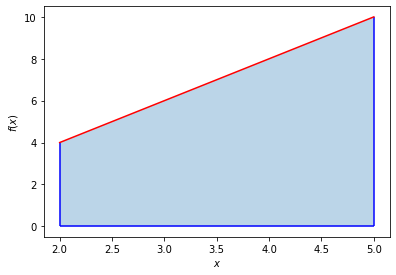

In [29]:
a = 2
b = 5

def_int, err = integrate.quad(f,a,b)

print('Area =',def_int)
print('Error =',err)

x = np.linspace(a,b,100)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,f(x),'r')

ax.vlines([a,b],[0,0],[f(a),f(b)],'b')
ax.hlines(0,a,b,'b')
ax.fill_between(x,f(x),alpha=0.3)

ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

plt.show()

The function `scipy.integrate.dblquad(g,a,b,c,d)` integrates a function `g(x,y)` between the bounds [`a`,`b`] in `x` and [`c`,`d`] in `y` using a technique from the Fortran library QUADPACK and returns the value `z` of the definite integral integral and the error in this calculation,

$$z = \int_c^d \int_a^b g(x,y)\ dx dy.$$

In [30]:
def g(x,y):
    return np.sqrt(x**2 + y**2 +16)

Area = 327.8820544699914
Error = 4.38526073264293e-09


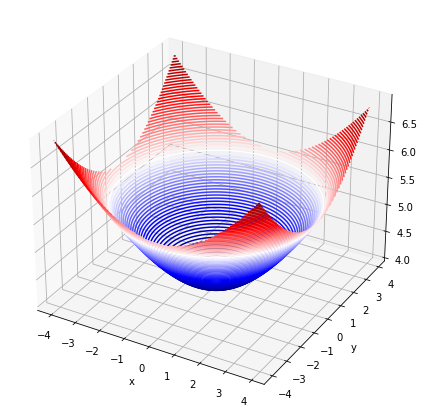

In [31]:
a = -4
b = 4
c = -4
d = 4

def_int, err = integrate.dblquad(g,a,b,c,d)

print('Area =',def_int)
print('Error =',err)


x = np.arange(a,b,0.1)
y = np.arange(c,d,0.1)


Xmesh,Ymesh = np.meshgrid(x, y)
Zmesh = g(Xmesh,Ymesh)

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,.8,.8],projection='3d')

ax.contour3D(Xmesh,Ymesh,Zmesh,90,cmap='seismic')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

The function `scipy.integrate.tplquad(h,a,b,c,d,e,f)` integrates a function `h(x,y,z)` between the bounds [`a`,`b`] in `x`, [`c`,`d`] in `y`, and [`e`,`f`] in `z` using a technique from the Fortran library QUADPACK and returns the value `k` of the definite integral and the error in this calculation,

$$k=\int_e^f \int_c^d \int_a^b h(x,y,z)\ dx dy dz.$$

In [32]:
def h(x,y,z):
    return np.sqrt(x**2 + y**2 +z**2 +16)

In [33]:
lower_bound = -4
upper_bound = 4

def_int, err = integrate.tplquad(h,lower_bound,upper_bound,lower_bound,upper_bound,lower_bound,upper_bound)

print('Area = ',def_int)
print('Error = ',err)

Area =  2872.0630239126044
Error =  8.054480129954428e-09


### 3.4.2 Ordinary Differential Equations (ODEs)

A first order ODE is an equation of the form

$$\frac{dy}{dt} = f(t,y). $$

Lets do an example of radioactive decay, and how we can use scipy to solve an ode. 

The half life of carbon-14 is 5700 years. It's corrseponding decay constant is given by the formula

$$k = \frac{ln(\frac{1}{2})}{5700} = -0.0001216$$

We can write an ordinary differential equation that encapsulates radioactive, exponential decay as follows

$$\frac{dy}{dt} = k*y $$

Lets solve this, for an initial $100$g sample of carbon-14, using `scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45',t_eval=None)`. This solves an ODE, given an initial value `y0`, over a time span `t_span`, where the right hand side of the above equation is given by `fun`. The method of integration is set to fourth-order Runge-Kutta by default. `t_eval` can be set to an array that specifies the times at which to store the solution, otherwise this is set by default. The function returns multiple attributes, most importantly `.t` and `.y` which give the stored times and $y$-values for the solution.

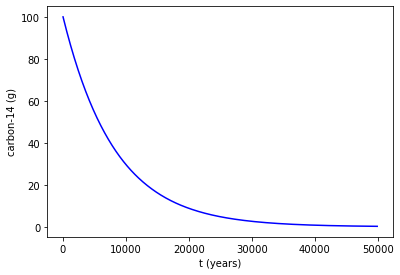

In [34]:
k = -0.0001216

def exponential_decay(t, y): 
    return k * y

t = np.arange(0,50000,100)
sol = integrate.solve_ivp(exponential_decay, [0, 50000], [100], t_eval=t)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(sol.t,sol.y[0,:],'b')
ax.set_xlabel('t (years)')
ax.set_ylabel('carbon-14 (g)')

plt.show()

We can also solve for multiple initial values of `y`, in other words that `y0` can be an array. Here we have solution for $100$g, $50$g, and $10$g of carbon-14.

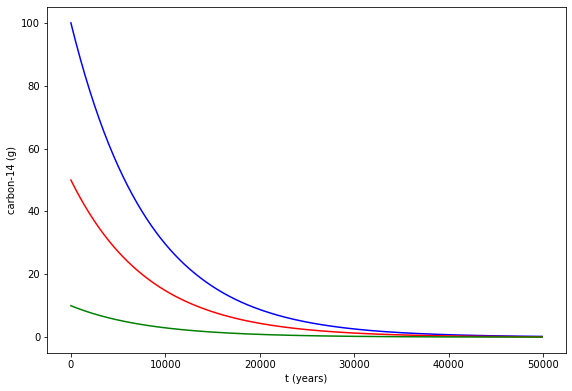

In [35]:
k = -0.0001216

def exponential_decay(t, y): return k * y

t = np.arange(0,50000,100)
sol = integrate.solve_ivp(exponential_decay, [0, 50000], [100,50,10], t_eval=t)

fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(sol.t,sol.y[0,:],'b',label = '$100$g')
ax.plot(sol.t,sol.y[1,:],'r',label = '$50$g')
ax.plot(sol.t,sol.y[2,:],'g',label = '$10$g')

ax.set_xlabel('t (years)')
ax.set_ylabel('carbon-14 (g)')

plt.show()

### 3.4.3 Finite-Difference Method

#### Taylor's Theorem

The taylor series allows us to approximate derivatives, particularly in a discrete step-wise manner. We will leverage this to our advantage, greatly simplifying integral and derivative problems.

$$f(x_0 + h) = f(x_0) + \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2  + ... + \frac{f^{(n)}(x_0)}{n!}h^n + R_n(x) $$

Lets start by truncating the series at $n=1$, assuming that the remainder $R_1(x)$ can be neglected.

$$f(x_0 + h) \approx f(x_0) + \frac{f'(x_0)}{1!}h $$

$$\implies f'(x_0) \approx \frac{f(x_0 + h)-f(x_0)}{h} $$

Thus we have an approximation for the first derivative over a discrete step $h$.

### The Laplace Operator

Lets do the something similar for the second derivative

$$f(x_0 + h) \approx f(x_0) + \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2 $$
$$f(x_0 - h) \approx f(x_0) - \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2 $$

Adding these two equations gives 

$$f''(x_0) \approx \frac{f(x_0 - h) -2f(x_0) + f(x_0 + h)}{h^2} $$

This is known as the Central-Difference Approximation.

Suppose we have six discrete values of a function $f$ inside some array/vector

$$f(x) = \begin{bmatrix}f_0 \\ f_1 \\ f_2 \\ f_3 \\ f_4 \\ f_5 \end{bmatrix} $$

We can transform this vector, multiplying by some matrix, that finds the second derivative at each discrete point $f_i$ using the above approximation.

$$\begin{bmatrix}f^{''}_0 \\ f^{''}_1 \\ f^{''}_2 \\ f^{''}_3 \\ f^{''}_4 \\ f^{''}_5 \end{bmatrix} = \frac{1}{h^2}\begin{bmatrix}-2 & 1 & 0 & 0 & 0 &0\\ 1 & -2 & 1 & 0 & 0 &0\\ 0 &1 & -2 & 1 & 0 &0 \\ 0& 0 &1 & -2 & 1 &0 \\ 0 & 0& 0 &1 & -2&1\\0 & 0 & 0& 0 &1 & -2 \end{bmatrix}\begin{bmatrix}f_0 \\ f_1 \\ f_2 \\ f_3 \\ f_4 \\ f_5 \end{bmatrix}$$

Where $h$ is the spacing between discrete inputs to $f$.

We will call this matrix/operator the Laplace Operator and label it as $\textbf{L}$, so that for $n$ discrete values of a function

$$\frac{\partial{}^2}{\partial{x^2}} =  \textbf{L} = \frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & 0 & & \cdots & & 0 \\ 
1 & -2 & 1 & 0 & & \cdots \\ 
0 & 1 & -2 & & & & & \vdots \\
0 & 0 & & \ddots & \ddots \\
& & & \ddots & \ddots & & 0 & 0 \\
\vdots & \vdots & & & & -2 & 1 & 0 \\ 
& & & & 0 & 1 & -2 & 1 \\ 
0 & & \cdots & & 0 & 0 & 1 & -2 \\
\end{bmatrix}
$$

Notice, that we can classify this as a sparse matrix, and leverage this using scipy.

Lets test this on $\frac{x^3}{6}$, where $\frac{d^2}{dx^2}\frac{x^3}{6}=x$

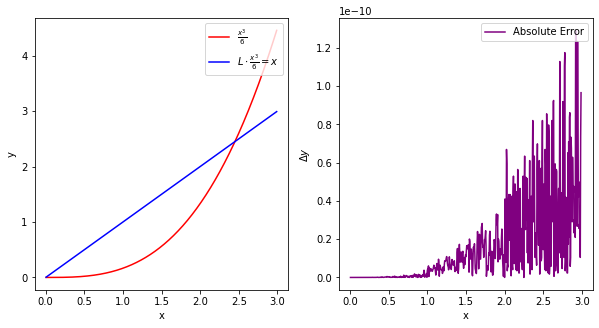

In [4]:
h = 0.005
x = np.arange(0, 3, h)
size = x.size

L = scipy.sparse.diags([1, -2, 1],[-1, 0, 1],shape=(size,size))/h**2

Error = abs(x[1:-1]-L.dot((x**3)/6)[1:-1])

fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(x[1:-1], ((x**3)/6)[1:-1], label=r"$\frac{x^3}{6}$",color="red")
ax1.plot(x[1:-1], L.dot(((x**3)/6))[1:-1], label=r"$L \cdot \frac{x^3}{6} = x$",color="blue")
ax1.legend(loc=1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax2.plot(x[1:-1],Error,label="Absolute Error",color="purple")
ax2.legend(loc=1)
ax2.set_xlabel('x')
ax2.set_ylabel(r"$\Delta y$")

plt.show()

### 3.4.4 Partial Differential Equations (PDEs)

### The Schrödinger Equation

Lets use the above function to solve a PDE, namely the time-independent Schrödinger equation in one-dimension:

$$\frac{-\hbar^2}{2m}\frac{\partial{}^2}{\partial{x^2}}\psi(t,x) + V(x)\psi(t,x) = i\hbar \frac{\partial{}}{\partial{t}}\psi(t,x) $$

We can rewrite this equation in the following way

$$i\hbar\frac{\partial{}}{\partial{t}}\psi(t,i) = \left[\frac{-\hbar^2}{2m}\textbf{L} + V(i)\right]\psi(t,i) $$

Where $x\rightarrow i$ is interpreted as discretising the problem. We have thus reduced the problem to an ODE, as seen above. 

Let's investigate, and solve the problem, with various potentials $V(x)$.

#### The Quantum Harmonic Osciallator

$$V(x) = \frac{1}{2}m\omega^2(x-a)^2 $$

$$\omega = \frac{2\pi}{T} $$

Where $\omega$ is the angular frequency of the oscillator, and $T$ is it's period, $m$ is the mass. $a$ is the centre of oscialltion. 

For ease, $m=\hbar=T=1 \implies \omega = 2\pi$ and

$$V(x) = 2\pi^2(x-a)^2$$

In [7]:
#Initialise the discrete spatial points, x, into an array
h = 0.005
x = np.arange(-10, 10, h)
size = x.size

#Define the Laplace Operator
L = scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(size, size)) / h**2

#Initialise the parameter values and potential V
hbar = 1 
m = 1
w = 2*np.pi
a = 0    
V = 0.5*m*(w**2)*(x-a)**2

#Define the function to be integrated
def wave_fun(t, psi):
    return -1j*(-(hbar/(2*m))*L.dot(psi) + (V/hbar)*psi)

# Time range for integration     
t_eval = np.arange(0.0, 1.0, h) 

We will define our initial state $\psi(t=0)$ as that of a wave packet scene in the previous section 6.4

$$\psi(x) = \frac{1}{(\pi \sigma^2)^{\frac{1}{4}}}e^{-\frac{(x-x_0)^2}{2\sigma^2}}e^{ifx} $$

Where $\sigma$ is the width, $x_0$ is it's position, and $f$ is it's frequency.

In [8]:
#Defining the initial state psi
f = 8*(2*np.pi)
sigma = 1.0 
x0 = a
packet = (1.0/np.sqrt(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

#Normalise
packet = packet/(np.sqrt(sum((abs(packet))**2)))

We will now solve using 
```scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45',t_eval=None)```

In [9]:
sol = integrate.solve_ivp(wave_fun, t_span = [0, 1], y0 = packet, t_eval = t_eval)

Now lets plot

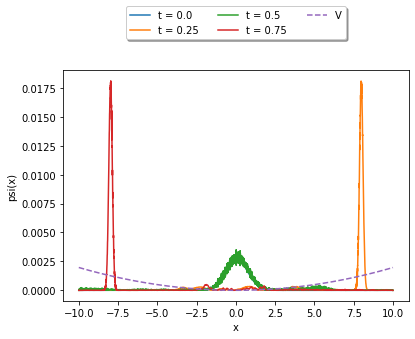

In [10]:
#Plot the result at different times
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

for i, t in enumerate(sol.t):
    if i%50==0:
        ax.plot(x, np.abs(sol.y[:,i])**2,label='t = {}'.format(t)) 

#Plot the potential, adjusting size for visual aid
ax.plot(x, V*0.000001, "--", label='V')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True, shadow=True)

ax.set_xlabel('x')
ax.set_ylabel('psi(x)')
plt.show()

<IPython.core.display.Javascript object>


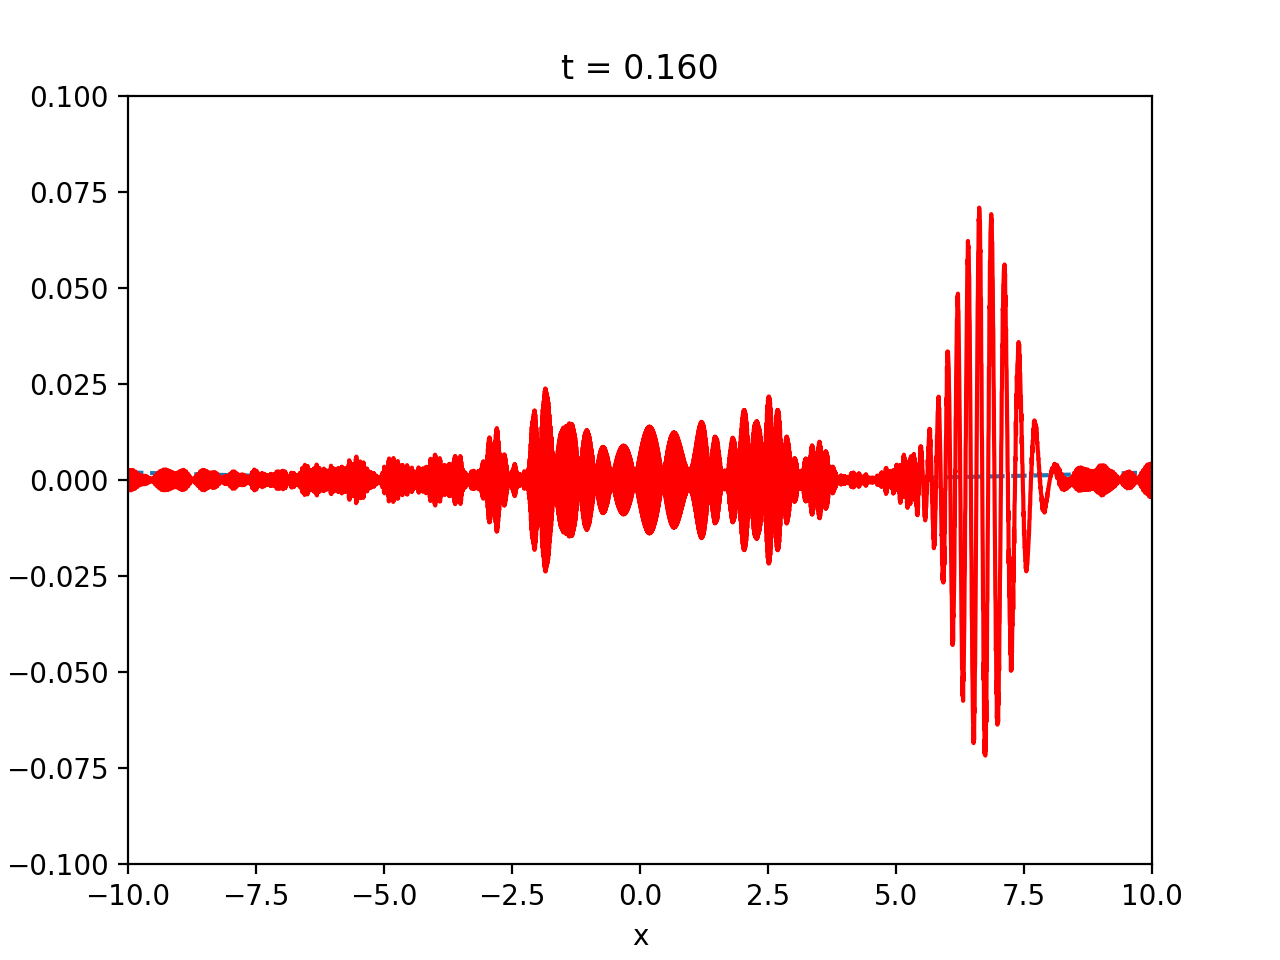

In [43]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_axes([.1,.1,.8,.8])

ax1.set_xlim(-10, 10)
ax1.set_ylim(-0.1, 0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('psi(x)')

title = ax1.set_title('The Quantum Harmonic Osciallator')

line1, = ax1.plot([], [], "--")
line2, = ax1.plot([], [],color='red')


def init():
    line1.set_data(x, V*0.000001)
    return line1,


def animate(i):
    line2.set_data(x, sol.y[:,i])
    title.set_text('t = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=50, blit=True)

plt.show()

#### Fourier Transform

<IPython.core.display.Javascript object>


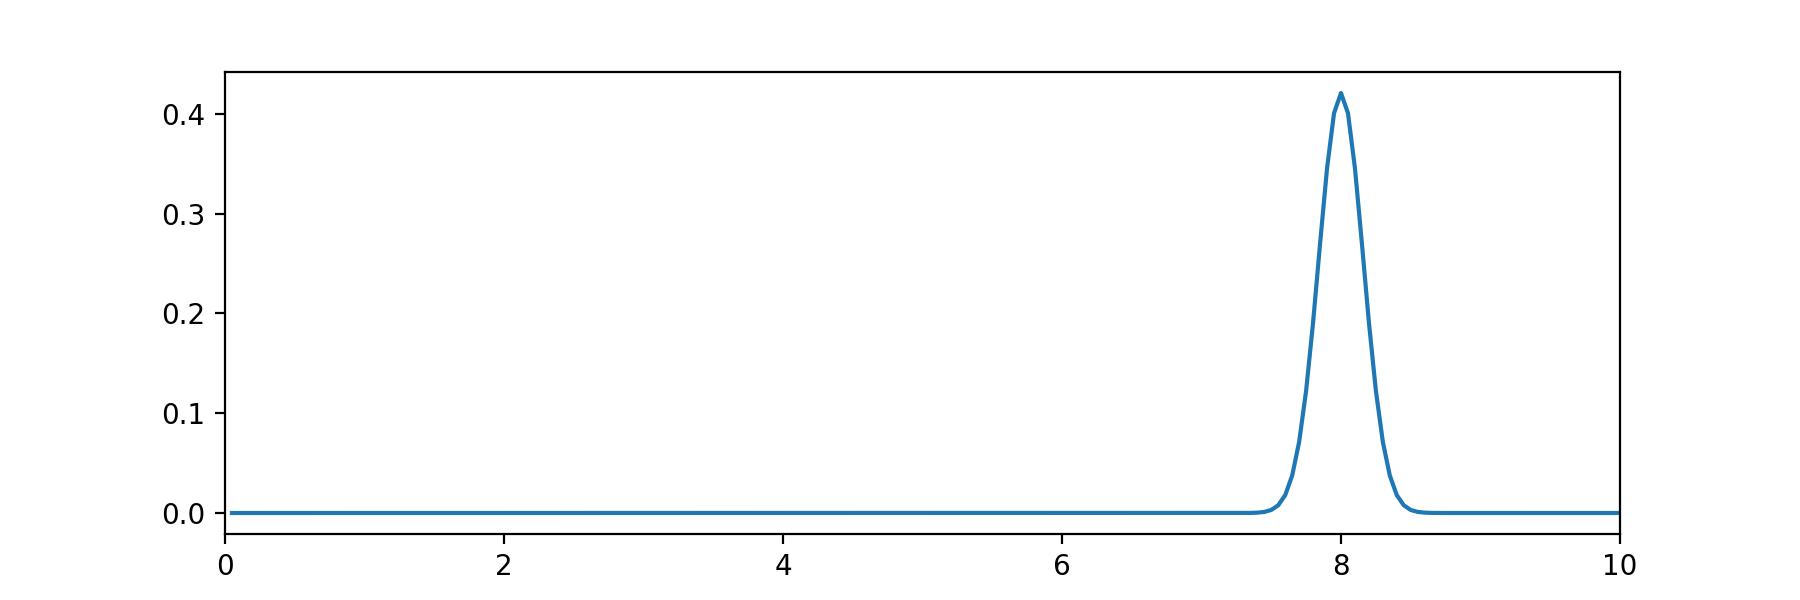

In [44]:
from numpy.fft import fftfreq
from scipy import fftpack


F = fftpack.fft(sol.y[:,0])
w = fftfreq(size, h)
F = F/(np.sqrt(sum((abs(F))**2)))

indices = w > 0 # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 10);

In [45]:
F = np.zeros(shape=(size,sol.y.size),dtype='complex')
w = fftfreq(size, h)


for i, t in enumerate(sol.t):
    F[:,i] = fftpack.fft(sol.y[:,i])
    F[:,i] = F[:,i]/(np.sqrt(sum((abs(F[:,i])**2))))
    sol.y[:,i] = sol.y[:,i]/(np.sqrt(sum((abs(sol.y[:,i])**2))))

print(np.sqrt(sum((abs(F[:,i])**2))))
print(np.sqrt(sum((abs(sol.y[:,i])**2))))

1.0000000000000013
0.999999999999998


(0.12615662610102787+9.912719241054443e-12j)


<IPython.core.display.Javascript object>


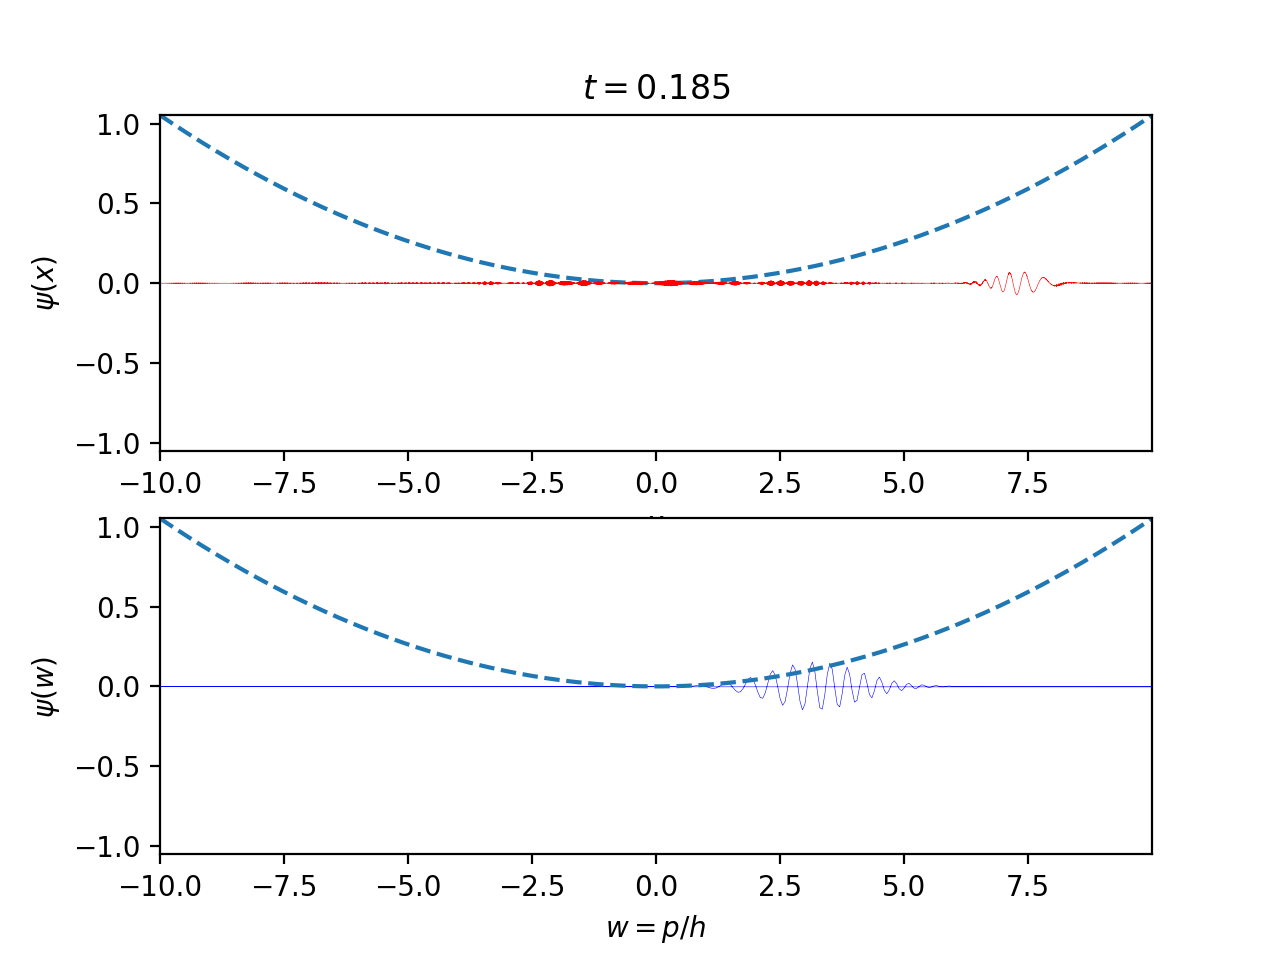

In [48]:
print(max(sol.y[:,0])/max(F[:,0]).real)
%matplotlib notebook
fig, (ax1,ax2) = plt.subplots(2,1)

limit = 2.5*max(F[:,0])
scaler = 1/(max(V)/limit)

ax1.set_xlim(x[0], x[-1])
ax1.set_ylim(-limit,limit)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\psi(x)$')

ax2.set_xlim(x[0], x[-1])
ax2.set_ylim(-limit, limit)
ax2.set_xlabel('$w=p/h$')
ax2.set_ylabel('$\psi(w)$')

title = ax1.set_title('The Quantum Harmonic Osciallator')

line1, = ax1.plot([], [], ls="--")
line2, = ax1.plot([], [],color='red', lw=.2)
line3, = ax2.plot([], [],color='blue', lw=.2)
line4, = ax2.plot([], [], ls="--")

def init():
    line1.set_data(x, V*scaler)
    line4.set_data(x, V*scaler)
    return line1,line4


def animate(i):
    line2.set_data(x, sol.y[:,i])
    line3.set_data(w, F[:,i])
    title.set_text('$t = {0:1.3f}$'.format(sol.t[i]))
    return line2,line3

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=50, blit=True)    
plt.show()

#### Step Potential & Quantum Tunnelling

In [49]:
h = 0.005
x = np.arange(0, 10, h)
size = x.size

LO = scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(size, size)) / h**2

hbar = 1 
m=1

x_Vmin = 5         # center of V(x)
T      = 1  

omega = 2 * np.pi / T
k = omega**2 * m
V = np.zeros(size)
V[int(V.size/2):] = x_Vmin*250

def psi_t(t, psi):
    return -1j * (- 0.5 * hbar / m * LO.dot(psi) + V / hbar * psi)

dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 0.2   # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

sigma=0.5
x0 = 3.0
kx = 50
A = 1.0 / (sigma * np.sqrt(np.pi))
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)



# Solve the Initial Value Problem
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval)

<IPython.core.display.Javascript object>


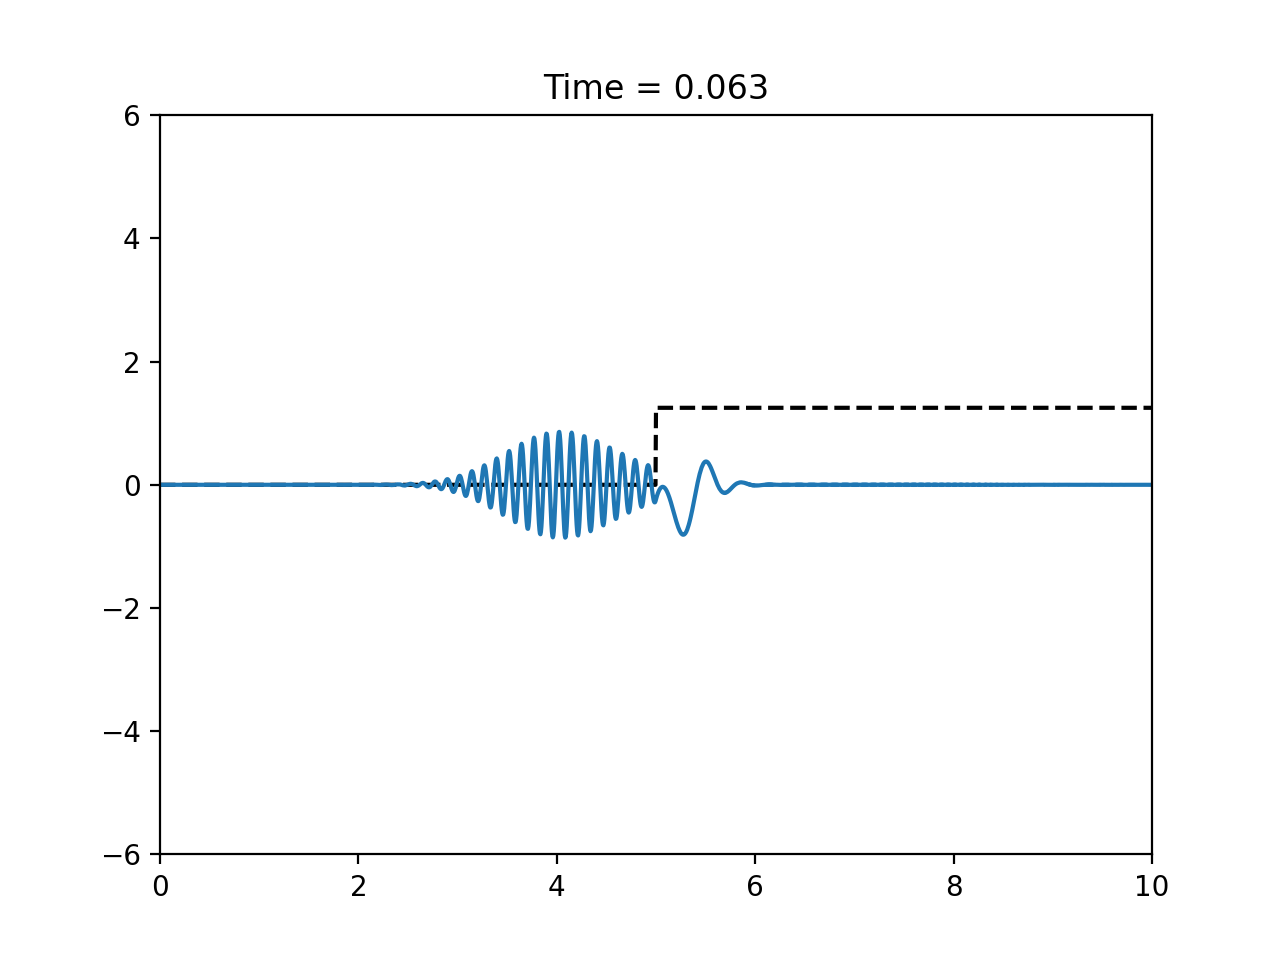

In [50]:
%matplotlib notebook

fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-6, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])


def init():
    line1.set_data(x, V * 0.001)
    return line1,


def animate(i):
    line2.set_data(x, (sol.y[:,i]).real)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


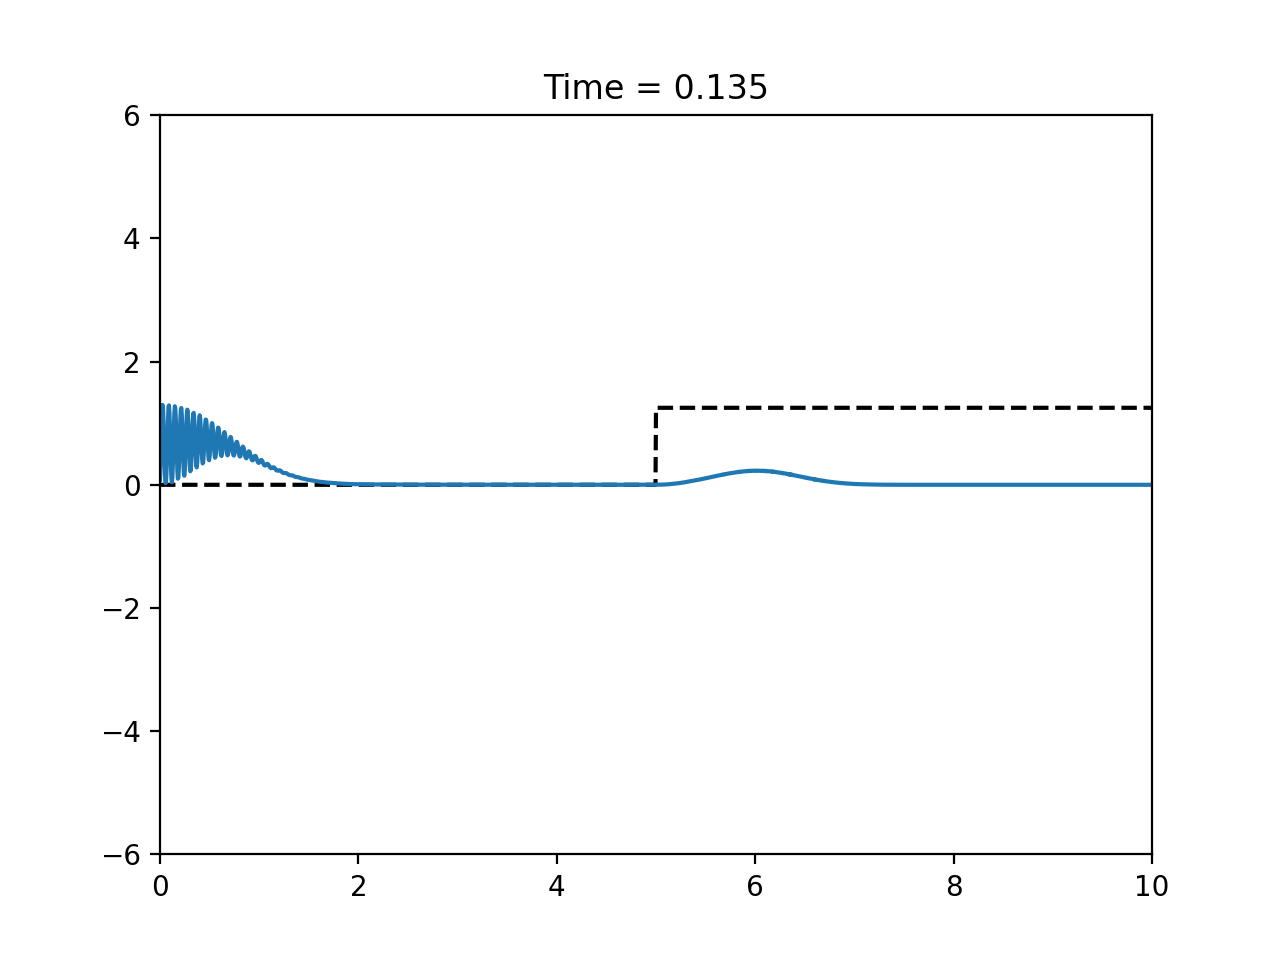

In [51]:
%matplotlib notebook

fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-6, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])


def init():
    line1.set_data(x, V * 0.001)
    return line1,


def animate(i):
    line2.set_data(x, (np.abs(sol.y[:,i]))**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


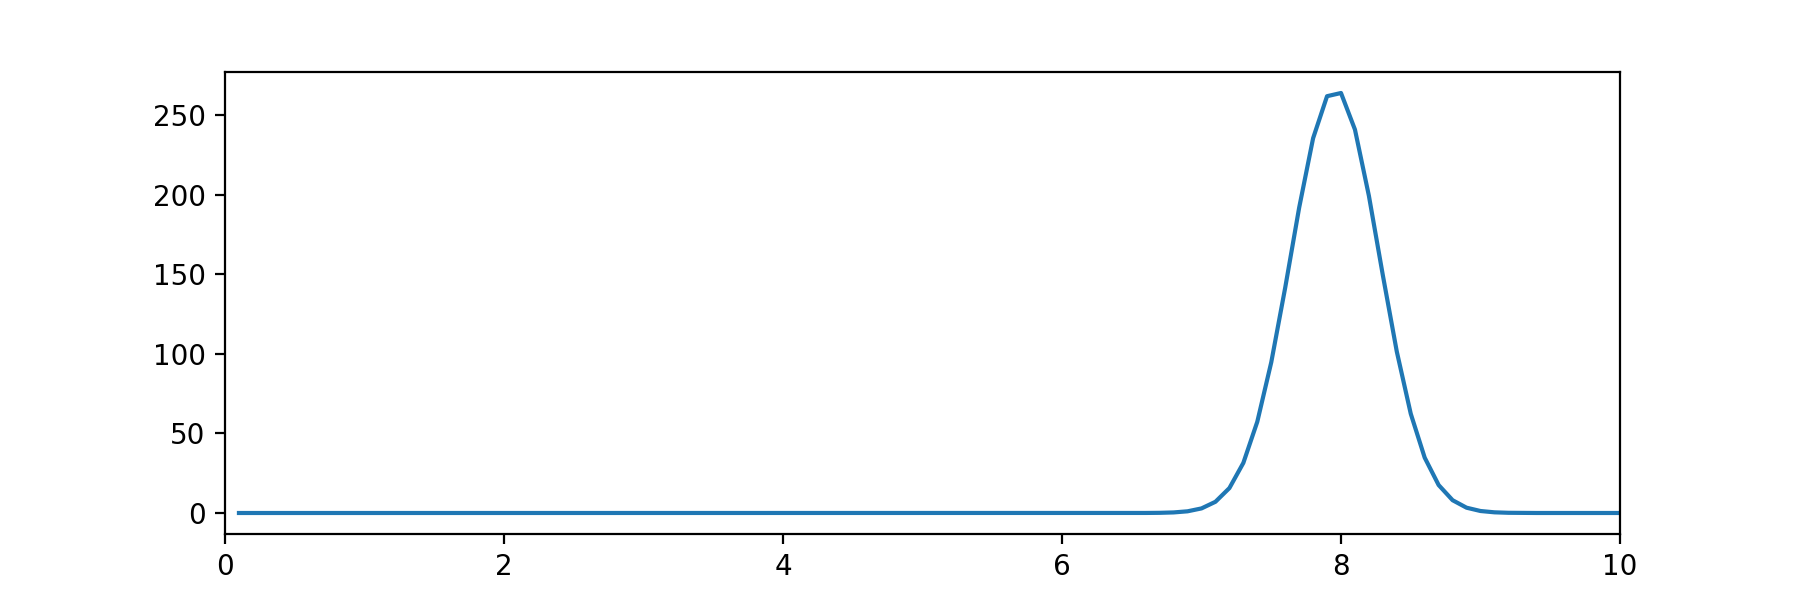

In [52]:
F = fftpack.fft(sol.y[:,0])
w = fftfreq(size, h)

indices = w > 0 # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 10)

plt.show()